# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.tail()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [5]:
azdias.shape

(891221, 85)

In [6]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [7]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [8]:
azdias.isnull().sum().sum()

4896838

In [9]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [10]:
feat_info.tail()

,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


In [11]:
feat_info.shape

(85, 4)

In [12]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [13]:
feat_info.info

<bound method DataFrame.info of                 attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric

In [14]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,RETOURTYP_BK_S,person,ordinal,[-1]
freq,1,43,49,26


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [15]:
# Identify missing or unknown data values and convert them to NaNs.

# identify
print("missing values are:",feat_info['missing_or_unknown'].unique())

# convert
for index in range(85):
    string = feat_info['missing_or_unknown'][index]
    to_list = string.strip('][').split(',')
    feature_name = feat_info['attribute'][index]
    for miss in to_list:
        if miss == '':
            break
        elif miss == 'X' or miss == 'XX':
            azdias[feature_name].replace(miss,np.nan,inplace=True)
        else:
            azdias[feature_name].replace(int(miss),np.nan,inplace=True)
        
    

missing values are: ['[-1,0]' '[-1,0,9]' '[0]' '[-1]' '[]' '[-1,9]' '[-1,X]' '[XX]' '[-1,XX]']


In [16]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [17]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
total_miss = azdias.isnull().sum()
print("total NaN at each column: \n\n",total_miss)


total NaN at each column: 

 AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
           

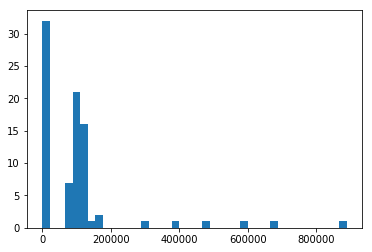

In [18]:
# Investigate patterns in the amount of missing data in each column.
n, bins, patches = plt.hist(total_miss,bins=40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98d15aac8>], dtype=object)

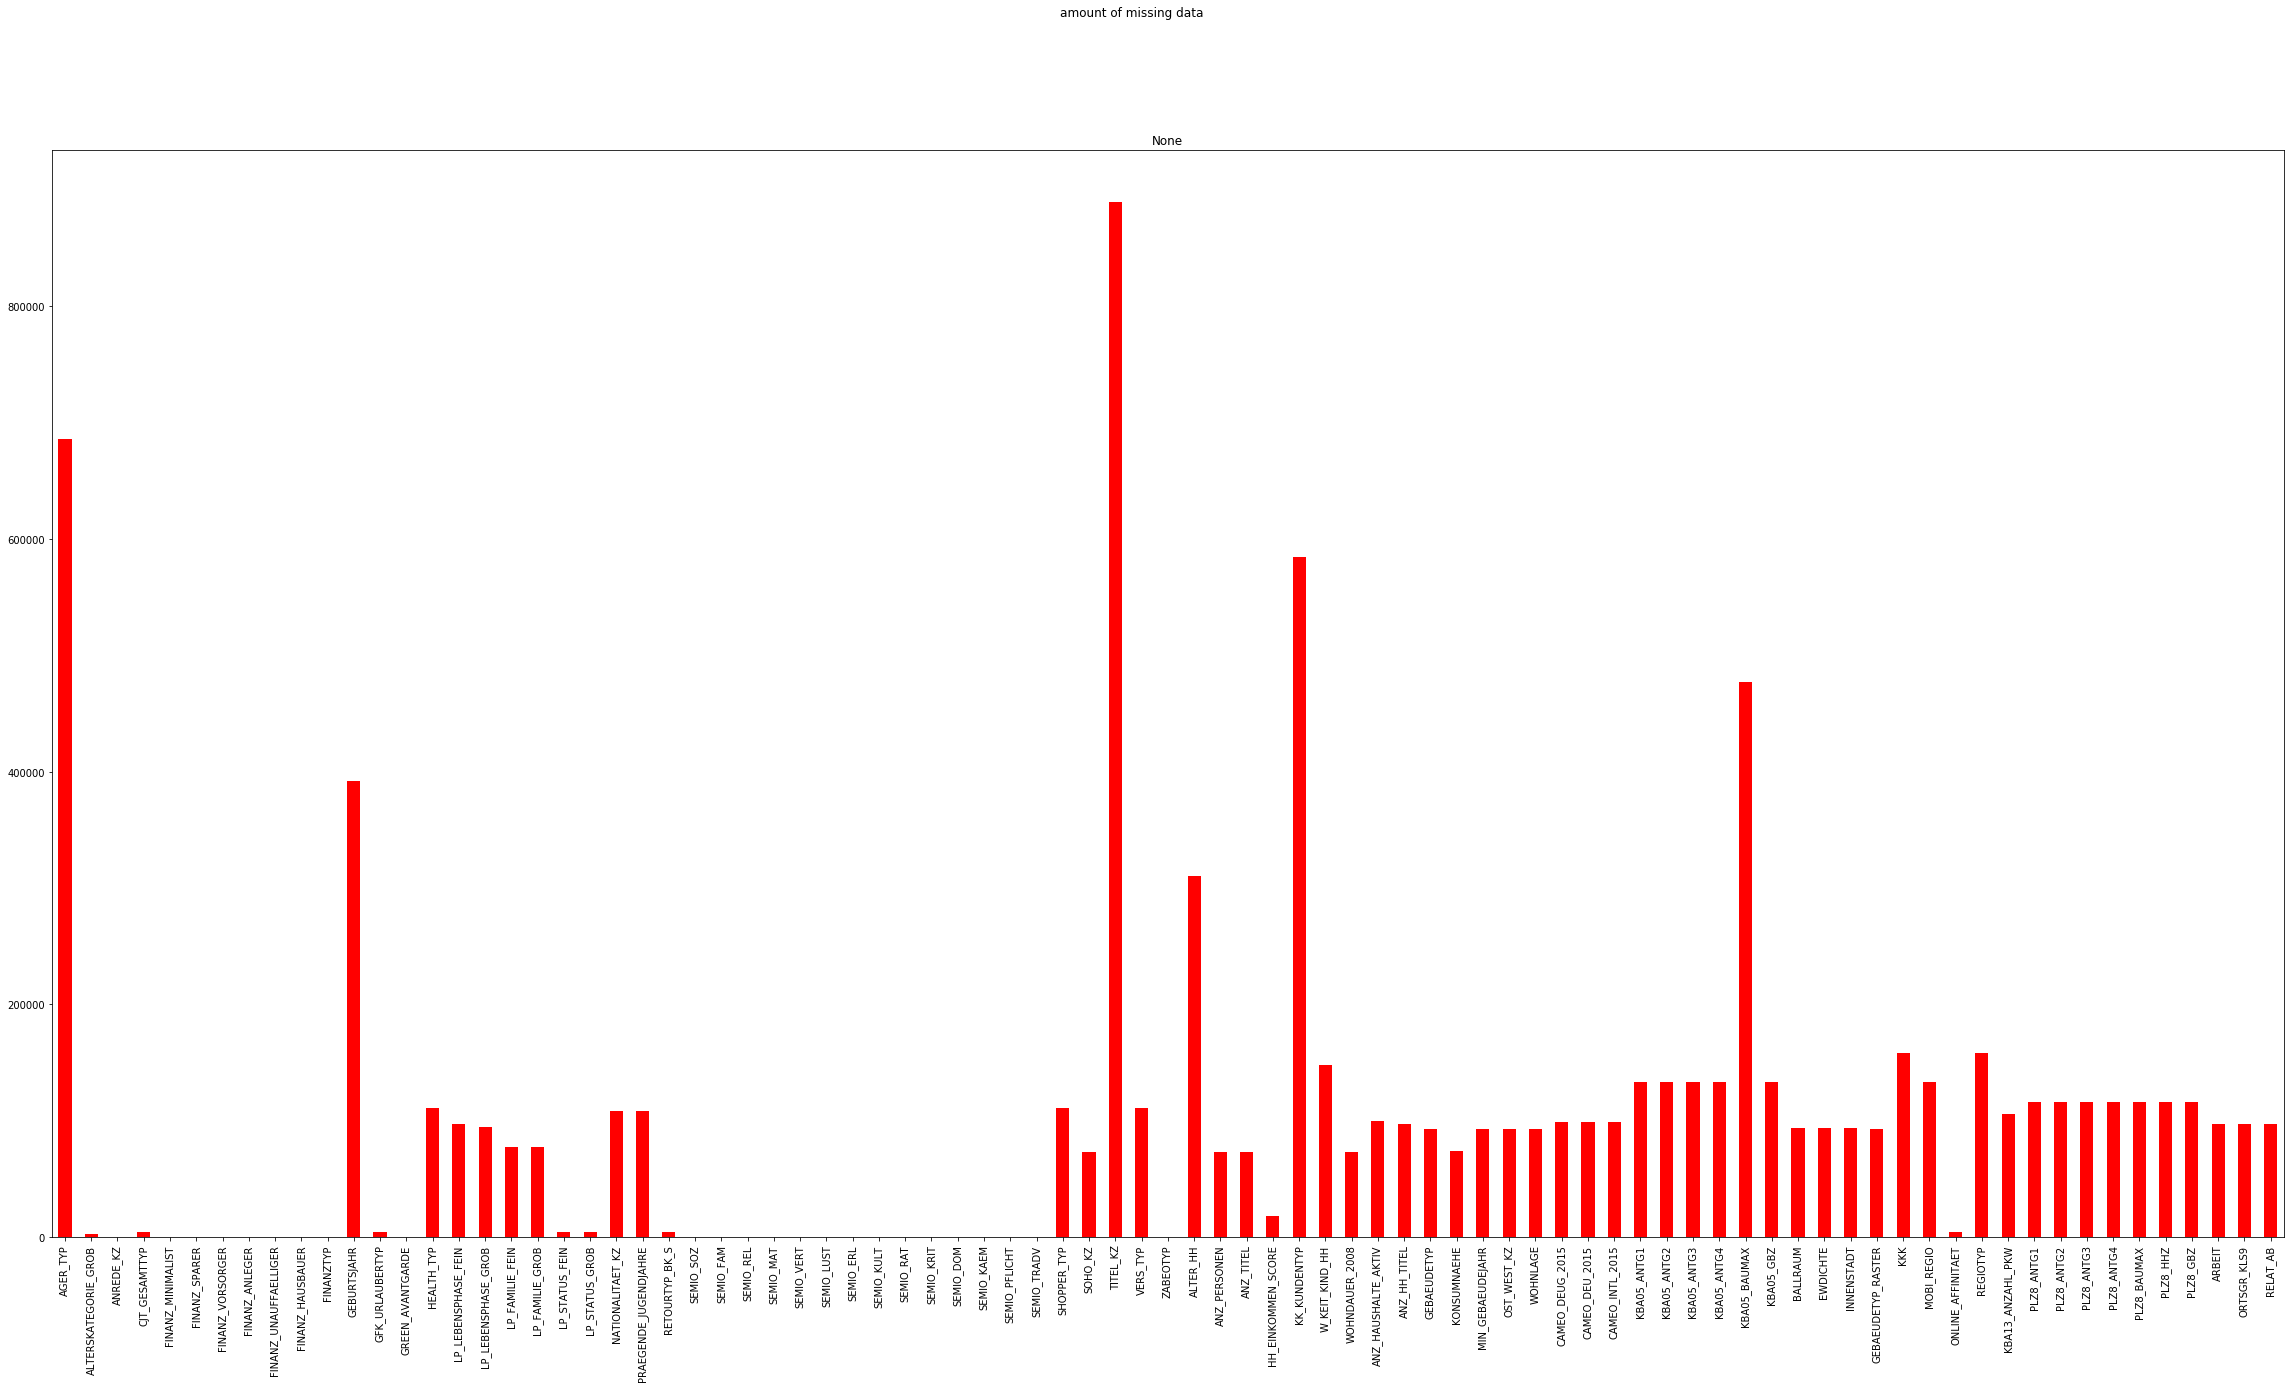

In [19]:
total_miss.plot(kind = 'bar',color='r',subplots=True,figsize=(40,20),title='amount of missing data')

In [20]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
percentage_null = azdias.isnull().sum() / len(azdias)
outliers_columns = percentage_null[percentage_null > 0.30].index
azdias.drop(outliers_columns, axis=1, inplace=True)
azdias.shape

(891221, 79)

In [21]:
outliers_columns

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9647a9cf8>], dtype=object)

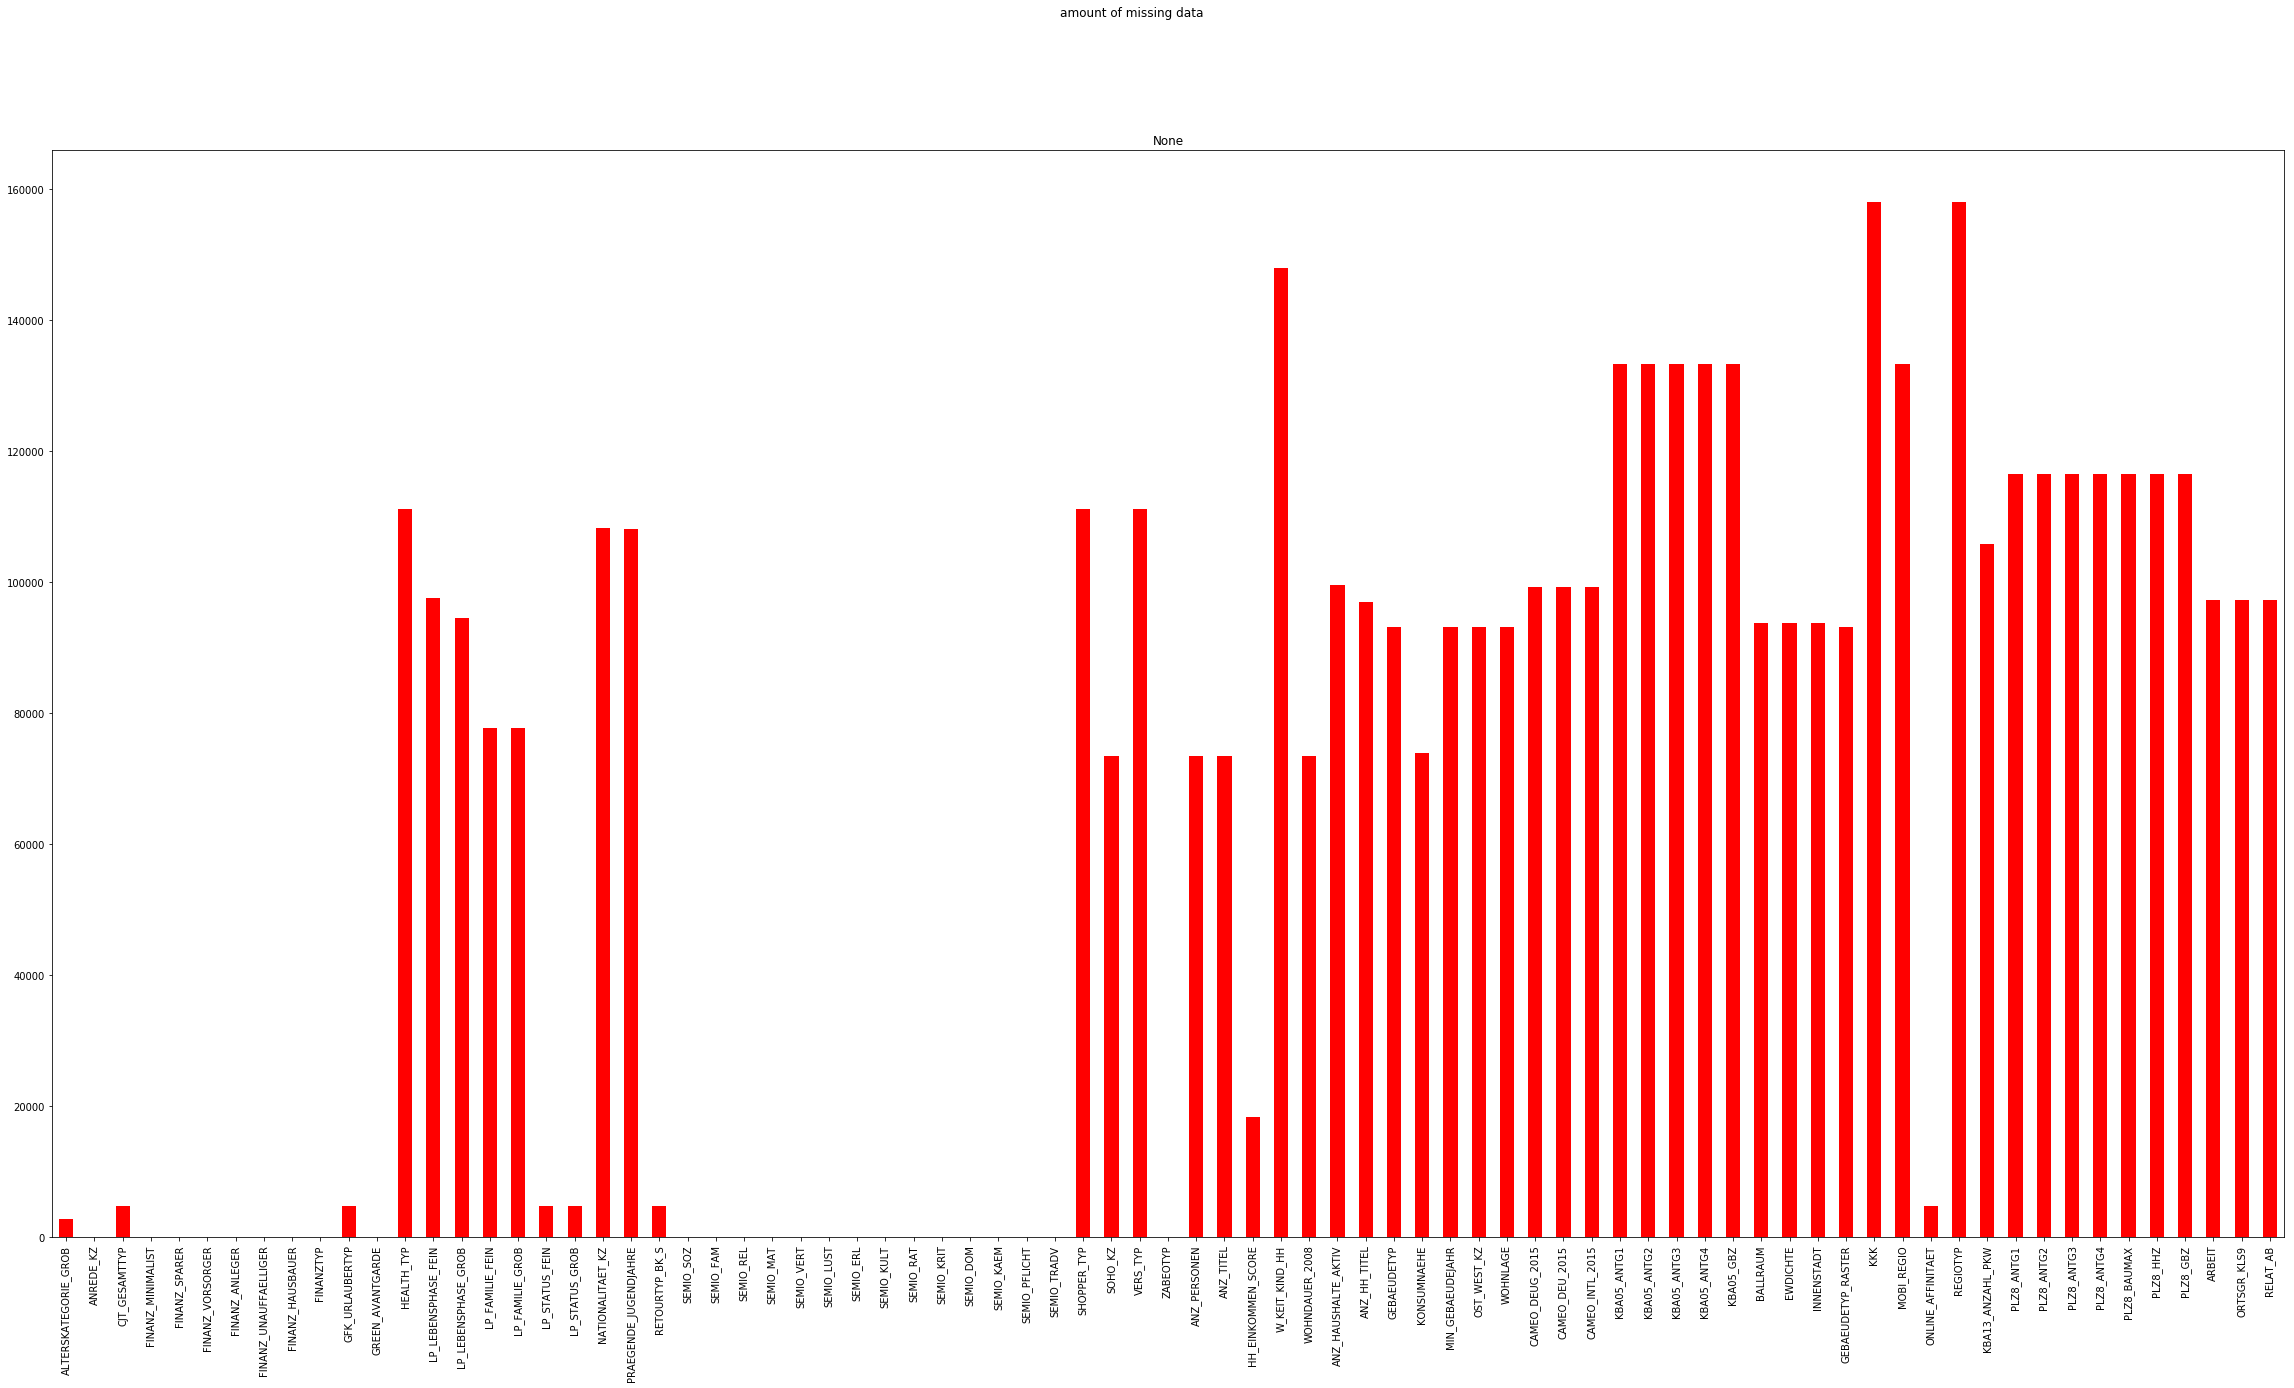

In [22]:
total_miss_after_remove = azdias.isnull().sum()
total_miss_after_remove.plot(kind = 'bar',color='r',subplots=True,figsize=(40,20),title='amount of missing data')

#### Discussion 1.1.2: Assess Missing Data in Each Column


I see columns that have the almost same amount of missing values(patterns), but others have very diff (outliers) amounts of missing value.
I see it when I plot the histogram, then I recognize that the columns now have 30% or more, missing value it is outliers.
then I remove these columns which is:-
['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX']

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [23]:
# How much data is missing in each row of the dataset?
row_miss = azdias.isnull().sum(axis=1)
print(row_miss)

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64


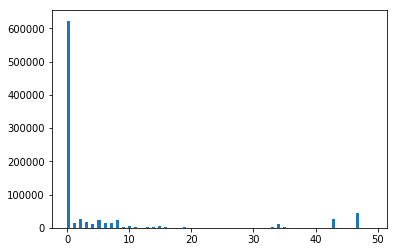

In [24]:
n, bins, patches = plt.hist(row_miss,bins=100)

In [25]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
df1 = azdias[azdias.isnull().sum(axis=1) >=1 ]
df2 = azdias[azdias.isnull().sum(axis=1) <1 ]



In [26]:
print(df1.shape)
print(df2.shape)

(268012, 79)
(623209, 79)


In [27]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


df1_no_miss_columns = df1.dropna(axis=1) # columns that contain no miss value in df1
df2_no_miss_columns = df2.dropna(axis=1)# columns that contain no miss value in df2

print(df1_no_miss_columns.shape)
print(df2_no_miss_columns.shape)


(268012, 24)
(623209, 79)


In [28]:
df1_no_miss_columns.columns

Index(['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT',
       'SEMIO_TRADV', 'ZABEOTYP'],
      dtype='object')

In [29]:
df2_no_miss_columns.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

Common five columns: ['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER']


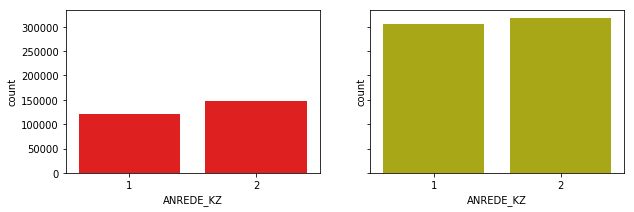

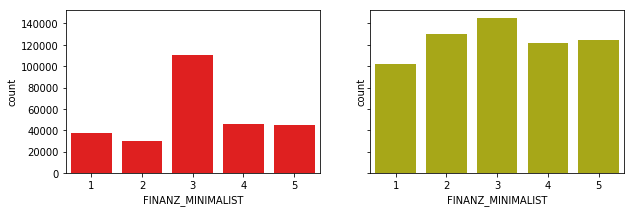

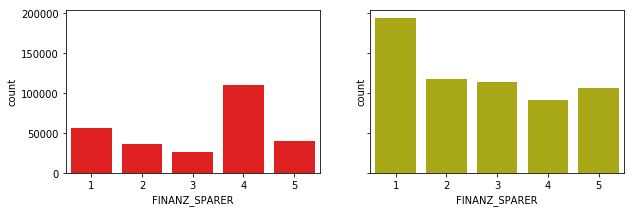

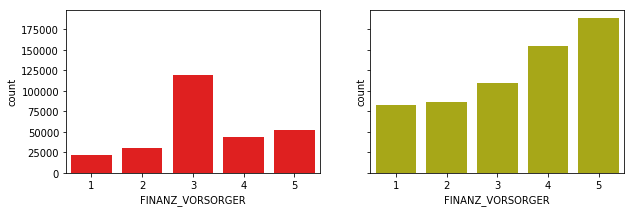

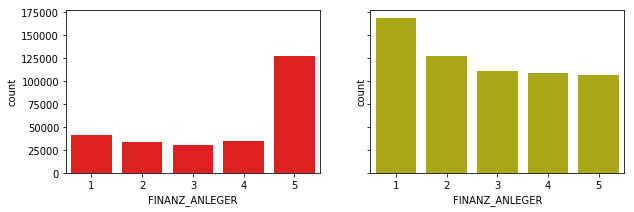

In [30]:
common_five_columns = ['ANREDE_KZ','FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER'] 
print('Common five columns:',common_five_columns)

def compareColumns(column_name):
    fig, axes = plt.subplots(1,2, figsize=(10, 3), sharey=True)
    sns.countplot(df1[column_name], ax=axes[0], color='r')
    sns.countplot(df2[column_name], ax=axes[1], color='y')
    
for x in range(5):
    compareColumns(common_five_columns[x])

#### Discussion 1.1.3: Assess Missing Data in Each Row

Are the data with lots of missing values are qualitatively different from data with few or no missing values?

Yes, they are different either in the number of rows between 2 sets, and the distribution of non-miss value in their columns.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [31]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [32]:
# How many features are there of each data type?
feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [33]:
# get the catogrical features forn df2
categorical = feat_info[feat_info['type']=='categorical']
categorical_columns = categorical['attribute']
categorical_columns_remove = [x for x in categorical_columns if x in df2.columns]
df2_catogrical = df2[categorical_columns_remove]
print('Catogrical columns:',df2_catogrical.columns)

Catogrical columns: Index(['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP',
       'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP',
       'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ',
       'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'],
      dtype='object')


In [34]:
df2_catogrical

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,GEBAEUDETYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,8.0,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,1.0,W,4,4C
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,1.0,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,1.0,W,8,8C
6,2,5.0,4,12.0,0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,4,1.0,W,4,4A
7,1,3.0,5,9.0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,8.0,W,2,2D
8,1,3.0,6,3.0,1,1.0,1.0,10.0,5.0,1.0,3.0,0.0,2.0,6,3.0,W,1,1A
9,2,4.0,1,12.0,1,1.0,1.0,3.0,2.0,1.0,3.0,0.0,2.0,4,3.0,W,1,1E
10,2,1.0,6,8.0,0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,3,1.0,W,9,9D
19,1,3.0,5,8.0,1,2.0,2.0,10.0,5.0,1.0,2.0,0.0,2.0,2,8.0,W,5,5D


In [35]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

binary =[]
multi_level=[]
for col in df2_catogrical:
    print('Column:',col,'Values:',df2_catogrical[col].unique())
    if len(df2_catogrical[col].unique()) == 2:
        binary.append(col)
    else:
        multi_level.append(col)

print('\n\n-----------------------------\n\n')
print('Binary:',binary, 'total is:',len(binary))
print('Multi_level',multi_level, 'total is:',len(multi_level))
    

Column: ANREDE_KZ Values: [2 1]
Column: CJT_GESAMTTYP Values: [ 5.  3.  2.  4.  1.  6.]
Column: FINANZTYP Values: [1 5 2 4 6 3]
Column: GFK_URLAUBERTYP Values: [ 10.   5.   1.  12.   9.   3.   8.  11.   4.   7.   6.   2.]
Column: GREEN_AVANTGARDE Values: [0 1]
Column: LP_FAMILIE_FEIN Values: [  5.   1.  10.   2.   7.  11.   8.   4.   6.   9.   3.]
Column: LP_FAMILIE_GROB Values: [ 3.  1.  5.  2.  4.]
Column: LP_STATUS_FEIN Values: [  2.   3.   4.   1.  10.   9.   5.   6.   7.   8.]
Column: LP_STATUS_GROB Values: [ 1.  2.  5.  4.  3.]
Column: NATIONALITAET_KZ Values: [ 1.  2.  3.]
Column: SHOPPER_TYP Values: [ 3.  2.  0.  1.]
Column: SOHO_KZ Values: [ 1.  0.]
Column: VERS_TYP Values: [ 2.  1.]
Column: ZABEOTYP Values: [5 4 1 6 3 2]
Column: GEBAEUDETYP Values: [ 8.  1.  3.  5.]
Column: OST_WEST_KZ Values: ['W' 'O']
Column: CAMEO_DEUG_2015 Values: ['8' '4' '6' '2' '1' '9' '5' '7' '3']
Column: CAMEO_DEU_2015 Values: ['8A' '4C' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5D' '9E' '9B' '1B' '8B' '7A

In [36]:
# Re-encode categorical variable(s) to be kept in the analysis.

#1.
print('Re-encode binary variable who values is not numeric:')

df2['OST_WEST_KZ'] = df2['OST_WEST_KZ'].replace({'W':0,'O':1})
print('Column:','OST_WEST_KZ','Values:',df2['OST_WEST_KZ'].unique())


Re-encode binary variable who values is not numeric:
Column: OST_WEST_KZ Values: [0 1]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
df2['OST_WEST_KZ']

1         0
2         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
19        0
21        0
22        0
27        0
28        0
31        0
32        0
33        0
36        0
37        0
38        0
41        0
43        0
44        0
45        0
47        0
49        0
50        0
51        0
52        0
55        0
         ..
891183    0
891186    0
891188    0
891189    0
891190    0
891191    0
891192    0
891193    0
891194    0
891195    0
891196    0
891197    0
891198    0
891199    0
891200    0
891201    0
891202    0
891204    0
891205    0
891206    0
891207    0
891209    0
891210    0
891211    0
891212    0
891213    0
891214    0
891215    0
891219    0
891220    0
Name: OST_WEST_KZ, Length: 623209, dtype: int64

In [38]:
#2. drop multi level catogrical feature
df2.drop(multi_level, axis=1, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
print(multi_level[0] in df2)

False


#### Discussion 1.2.1: Re-Encode Categorical Features

reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?

These columns :['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP'] total is 5. it is binary numeric values, so I kept them.


This column : ['OST_WEST_KZ'] is a binary but not numeric value, so I map W to 0 and O to 1.


The remaining columns are multi-level, so I drop them from the dataset.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [40]:
# get the mixed features forn df2
mixed = feat_info[feat_info['type']=='mixed']
mixed_columns = mixed['attribute']
mixed_columns
mixed_columns_remove = [x for x in mixed_columns if x in df2.columns]
df2_mixed = df2[mixed_columns_remove]
print('Mixed features:',df2_mixed.columns)

Mixed features: Index(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE',
       'WOHNLAGE', 'CAMEO_INTL_2015', 'PLZ8_BAUMAX'],
      dtype='object')


In [41]:
df2_mixed

,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,WOHNLAGE,CAMEO_INTL_2015,PLZ8_BAUMAX
1,21.0,6.0,14.0,4.0,51,1.0
2,3.0,1.0,15.0,2.0,24,1.0
4,32.0,10.0,8.0,3.0,43,2.0
5,8.0,2.0,3.0,7.0,54,1.0
6,2.0,1.0,10.0,5.0,22,1.0
7,5.0,2.0,8.0,1.0,14,1.0
8,10.0,3.0,11.0,1.0,13,1.0
9,4.0,1.0,15.0,7.0,15,1.0
10,6.0,2.0,3.0,5.0,51,2.0
19,20.0,5.0,9.0,1.0,34,2.0


In [42]:
df2["PRAEGENDE_JUGENDJAHRE"]

1         14.0
2         15.0
4          8.0
5          3.0
6         10.0
7          8.0
8         11.0
9         15.0
10         3.0
19         9.0
21        10.0
22        14.0
27        11.0
28        10.0
31        10.0
32        15.0
33         8.0
36         8.0
37         8.0
38        10.0
41        15.0
43        14.0
44         8.0
45         5.0
47         4.0
49        10.0
50        14.0
51        15.0
52        14.0
55         8.0
          ... 
891183     4.0
891186    15.0
891188    14.0
891189    11.0
891190     4.0
891191     3.0
891192    14.0
891193     5.0
891194    11.0
891195     8.0
891196    14.0
891197    11.0
891198    15.0
891199    10.0
891200    14.0
891201    10.0
891202    10.0
891204    10.0
891205     3.0
891206    14.0
891207     2.0
891209    14.0
891210     8.0
891211     8.0
891212     3.0
891213    11.0
891214    14.0
891215    10.0
891219    14.0
891220     3.0
Name: PRAEGENDE_JUGENDJAHRE, Length: 623209, dtype: float64

In [43]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
print('PRAEGENDE_JUGENDJAHRE values:',df2["PRAEGENDE_JUGENDJAHRE"].unique())

# movement = 1 :mainstream ,2: avantgarde
dic_movement = {1:1,3:1,5:1,8:1,10:1,12:1,14:1,2:2,4:2,6:2,7:2,9:2,11:2,13:2,15:2}
df2['MOVEMENT']  = df2["PRAEGENDE_JUGENDJAHRE"].map(dic_movement)
# decade = 40 :1, 50:2, 60:3, 70:4, 80:5, 90: 6
dic_decade = {1:1,2:1,3:2,4:2,5:3,6:3,7:3,8:4,9:4,10:5,11:5,12:5,13:5,14:6,15:6}
df2['DECADE'] = df2["PRAEGENDE_JUGENDJAHRE"].map(dic_decade)

#remove "PRAEGENDE_JUGENDJAHRE" from it
df2.drop("PRAEGENDE_JUGENDJAHRE", axis=1, inplace=True)

PRAEGENDE_JUGENDJAHRE values: [ 14.  15.   8.   3.  10.  11.   9.   5.   4.   2.   6.   1.  12.  13.   7.]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
df2['MOVEMENT'] 

1         1
2         2
4         1
5         1
6         1
7         1
8         2
9         2
10        1
19        2
21        1
22        1
27        2
28        1
31        1
32        2
33        1
36        1
37        1
38        1
41        2
43        1
44        1
45        1
47        2
49        1
50        1
51        2
52        1
55        1
         ..
891183    2
891186    2
891188    1
891189    2
891190    2
891191    1
891192    1
891193    1
891194    2
891195    1
891196    1
891197    2
891198    2
891199    1
891200    1
891201    1
891202    1
891204    1
891205    1
891206    1
891207    2
891209    1
891210    1
891211    1
891212    1
891213    2
891214    1
891215    1
891219    1
891220    1
Name: MOVEMENT, Length: 623209, dtype: int64

In [45]:
df2['DECADE']

1         6
2         6
4         4
5         2
6         5
7         4
8         5
9         6
10        2
19        4
21        5
22        6
27        5
28        5
31        5
32        6
33        4
36        4
37        4
38        5
41        6
43        6
44        4
45        3
47        2
49        5
50        6
51        6
52        6
55        4
         ..
891183    2
891186    6
891188    6
891189    5
891190    2
891191    2
891192    6
891193    3
891194    5
891195    4
891196    6
891197    5
891198    6
891199    5
891200    6
891201    5
891202    5
891204    5
891205    2
891206    6
891207    1
891209    6
891210    4
891211    4
891212    2
891213    5
891214    6
891215    5
891219    6
891220    2
Name: DECADE, Length: 623209, dtype: int64

In [46]:
df2["CAMEO_INTL_2015"]

1         51
2         24
4         43
5         54
6         22
7         14
8         13
9         15
10        51
19        34
21        55
22        51
27        51
28        13
31        51
32        14
33        41
36        41
37        24
38        25
41        25
43        25
44        24
45        41
47        25
49        43
50        43
51        31
52        41
55        51
          ..
891183    34
891186    45
891188    24
891189    25
891190    15
891191    44
891192    32
891193    43
891194    24
891195    55
891196    23
891197    24
891198    14
891199    51
891200    52
891201    41
891202    41
891204    24
891205    34
891206    25
891207    41
891209    51
891210    41
891211    51
891212    51
891213    34
891214    23
891215    31
891219    51
891220    43
Name: CAMEO_INTL_2015, Length: 623209, dtype: object

In [47]:
type(df2["CAMEO_INTL_2015"].unique()[0])

str

In [48]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
print('CAMEO_INTL_2015 values:',df2["CAMEO_INTL_2015"].unique())

# wealth = Wealthy:1, Prosperous:2, Comfortable:3, Less Affluent:4, Poorer: 5

df2['WEALTH'] = df2["CAMEO_INTL_2015"].map({'11':1,'12':1,'13':1,'14':1,'15':1,'21':2,'22':2,'23':2,'24':2,'25':2,'31':3,'32':3,'33':3,'34':3,'35':3,'41':4,'42':4,'43':4,'44':4,'45':4,'51':5,'52':5,'53':5,'54':5,'55':5})

# life stage = Pre-Family Couples & Singles:1, Young Couples With Children:2, Families With School Age Children:3, Older Families &  Mature Couples:4, Elders In Retirement:5
df2['LIFE_STAGE'] = df2["CAMEO_INTL_2015"].map({'11':1,'12':2,'13':3,'14':4,'15':5,'21':1,'22':2,'23':3,'24':4,'25':5,'31':1,'32':2,'33':3,'34':4,'35':5,'41':1,'42':2,'43':3,'44':4,'45':5,'51':1,'52':2,'53':3,'54':4,'55':5})

# remove df2["CAMEO_INTL_2015"] from df2
df2.drop("CAMEO_INTL_2015", axis=1, inplace=True)

CAMEO_INTL_2015 values: ['51' '24' '43' '54' '22' '14' '13' '15' '34' '55' '41' '25' '31' '52' '45'
 '35' '33' '44' '32' '23' '12']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
df2['WEALTH']

1         5
2         2
4         4
5         5
6         2
7         1
8         1
9         1
10        5
19        3
21        5
22        5
27        5
28        1
31        5
32        1
33        4
36        4
37        2
38        2
41        2
43        2
44        2
45        4
47        2
49        4
50        4
51        3
52        4
55        5
         ..
891183    3
891186    4
891188    2
891189    2
891190    1
891191    4
891192    3
891193    4
891194    2
891195    5
891196    2
891197    2
891198    1
891199    5
891200    5
891201    4
891202    4
891204    2
891205    3
891206    2
891207    4
891209    5
891210    4
891211    5
891212    5
891213    3
891214    2
891215    3
891219    5
891220    4
Name: WEALTH, Length: 623209, dtype: int64

In [50]:
df2['LIFE_STAGE']

1         1
2         4
4         3
5         4
6         2
7         4
8         3
9         5
10        1
19        4
21        5
22        1
27        1
28        3
31        1
32        4
33        1
36        1
37        4
38        5
41        5
43        5
44        4
45        1
47        5
49        3
50        3
51        1
52        1
55        1
         ..
891183    4
891186    5
891188    4
891189    5
891190    5
891191    4
891192    2
891193    3
891194    4
891195    5
891196    3
891197    4
891198    4
891199    1
891200    2
891201    1
891202    1
891204    4
891205    4
891206    5
891207    1
891209    1
891210    1
891211    1
891212    1
891213    4
891214    3
891215    1
891219    1
891220    3
Name: LIFE_STAGE, Length: 623209, dtype: int64

#### Discussion 1.2.2: Engineer Mixed-Type Features

 Which ones did you keep, which did you drop, and what engineering steps did you perform?

---------
I drop "PRAEGENDE_JUGENDJAHRE", instead of it I add 'MOVEMENT' and 'DECADE', this is two new variables to capture the other two dimensions: an interval-type variable for a decade, and a binary variable for movement. where

-'MOVEMENT' encoded as
- mainstream :1
- avantgarde :2   


-'DECADE' encoded as
- 40:1
- 50:2
- 60:3
- 70:4
- 80:5
- 90:6

---------
I drop "CAMEO_INTL_2015",  instead of it I add 'WEALTH' and 'LIFE_STAGE', this is two new ordinal variables for wealth and life stage info. where

-'WEALTH' encoded as
- Wealthy:1
- Prosperous:2
- Comfortable:3
- Less Affluent:4
- Poorer: 5

-'LIFE_STAGE' encoded as 
- Pre-Family Couples & Singles:1
- Young Couples With Children:2
- Families With School Age Children:3
- Older Families &  Mature Couples:4
- Elders In Retirement:5

---------
 the other mixed-type features I kept without new engineering variables.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [51]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
df2.shape


(623209, 68)

In [52]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# cheak mixed featues
print('MOVEMENT' in df2)
print('DECADE' in df2)
print("PRAEGENDE_JUGENDJAHRE" in df2)


print('WEALTH' in df2)
print('LIFE_STAGE' in df2)
print("CAMEO_INTL_2015" in df2)



True
True
False
True
True
False


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [53]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep=';')
    for index in range(85):
        string = feat_info['missing_or_unknown'][index]
        to_list = string.strip('][').split(',')
        feature_name = feat_info['attribute'][index]
        for miss in to_list:
            if miss == '':
                break
            elif miss == 'X' or miss == 'XX':
                df[feature_name].replace(miss,np.nan,inplace=True)
            else:
                df[feature_name].replace(int(miss),np.nan,inplace=True)
    
    #-------------------------------------------------
    
    # remove selected columns and rows, ...
    
    # columns
    # drop columns with more than 30% of missing values
   # percentage_null = df.isnull().sum() / len(df)
   # outliers_columns = percentage_null[percentage_null > 0.30].index
   # outliers_columns
    outliers_columns= ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP','KBA05_BAUMAX']
    df.drop(outliers_columns, axis=1, inplace=True)
    
    # rows: take only non_missing value
    df_final = df[df.isnull().sum(axis=1) < 1 ]

    #-------------------------------------------------
    
    
    # select, re-encode, and engineer column values.
    #binary
    df_final['OST_WEST_KZ'] = df_final['OST_WEST_KZ'].replace({'W':0,'O':1})
    #catogrical
    df_final.drop(multi_level, axis=1, inplace=True)
    #mixed
    
    #1.PRAEGENDE_JUGENDJAHRE
    # movement = 1 :mainstream ,2: avantgarde
    dic_movement = {1:1,3:1,5:1,8:1,10:1,12:1,14:1,2:2,4:2,6:2,7:2,9:2,11:2,13:2,15:2}
    df_final['MOVEMENT']  = df_final["PRAEGENDE_JUGENDJAHRE"].map(dic_movement)
    # decade = 40 :1, 50:2, 60:3, 70:4, 80:5, 90: 6
    dic_decade = {1:1,2:1,3:2,4:2,5:3,6:3,7:3,8:4,9:4,10:5,11:5,12:5,13:5,14:6,15:6}
    df_final['DECADE'] = df_final["PRAEGENDE_JUGENDJAHRE"].map(dic_decade)

    #remove "PRAEGENDE_JUGENDJAHRE" from it
    df_final.drop("PRAEGENDE_JUGENDJAHRE", axis=1, inplace=True)
    
    #2.CAMEO_INTL_2015
    # wealth = Wealthy:1, Prosperous:2, Comfortable:3, Less Affluent:4, Poorer: 5
    df_final['WEALTH'] = df_final["CAMEO_INTL_2015"].map({'11':1,'12':1,'13':1,'14':1,'15':1,'21':2,'22':2,'23':2,'24':2,'25':2,'31':3,'32':3,'33':3,'34':3,'35':3,'41':4,'42':4,'43':4,'44':4,'45':4,'51':5,'52':5,'53':5,'54':5,'55':5})

    # life stage = Pre-Family Couples & Singles:1, Young Couples With Children:2, Families With School Age Children:3, Older Families &  Mature Couples:4, Elders In Retirement:5
    df_final['LIFE_STAGE'] = df_final["CAMEO_INTL_2015"].map({'11':1,'12':2,'13':3,'14':4,'15':5,'21':1,'22':2,'23':3,'24':4,'25':5,'31':1,'32':2,'33':3,'34':4,'35':5,'41':1,'42':2,'43':3,'44':4,'45':5,'51':1,'52':2,'53':3,'54':4,'55':5})

    # remove df2["CAMEO_INTL_2015"] from df2
    df_final.drop("CAMEO_INTL_2015", axis=1, inplace=True)
    
    #-------------------------------------------------
    
    # Return the cleaned dataframe.
    return df_final
    
    

In [54]:
# test clean methods
azdias2 = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep=';')
azdias2_after_clean = clean_data(azdias2)

print('DataFrame frorm previous cleaning:',df2.shape)
print('DataFrame frorm method cleaning:',azdias2_after_clean.shape)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-p

DataFrame frorm previous cleaning: (623209, 68)
DataFrame frorm method cleaning: (623209, 68)


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [55]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
df2.isnull().sum().sum() # I remove it before, so I don't need this step now

0

In [56]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns = df2.columns)
print(df2_scaled.shape)
df2_scaled.head()

(623209, 68)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,-1.746291,0.977825,-1.512224,1.581058,-1.045042,1.539058,1.047073,1.340482,-0.553670,1.044647,...,-0.667337,1.441599,0.583438,-0.201181,-0.171845,0.656462,-0.553670,1.164454,1.147882,-1.251108
1,0.202107,0.977825,-1.512224,0.900443,-1.765051,-0.531628,0.318373,1.340482,1.806129,1.044647,...,-0.667337,0.400949,0.583438,-0.201181,-0.171845,-0.823844,1.806129,1.164454,-0.909997,0.749822
2,0.202107,-1.022678,0.692406,0.219828,0.394976,-1.221857,0.318373,-0.856545,-0.553670,1.044647,...,0.009742,-0.639702,-0.314764,0.809743,0.263748,1.396614,-0.553670,-0.213400,0.461922,0.082845
3,-1.746291,0.977825,-0.042471,-1.141401,1.114984,-0.531628,-0.410328,1.340482,-0.553670,1.044647,...,-0.667337,1.441599,1.481640,-1.212105,-1.043032,-0.083691,-0.553670,-1.591253,1.147882,0.749822
4,-0.772092,0.977825,-1.512224,1.581058,-1.765051,1.539058,1.047073,-0.124203,-0.553670,-0.273496,...,-0.667337,1.441599,1.481640,0.809743,0.263748,-0.083691,-0.553670,0.475527,-0.909997,-0.584131


### Discussion 2.1: Apply Feature Scaling



For missing value, I don't have it because I removed it in clean methods.
for feature scaling, I apply StandardScaler on my data and perform fit, transfer operation at the same step.
so that scaling each feature to mean 0 and standard deviation 1.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [57]:
# Apply PCA to the data.
#X = StandardScaler().fit_transform(df2_scaled)

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(df2_scaled)


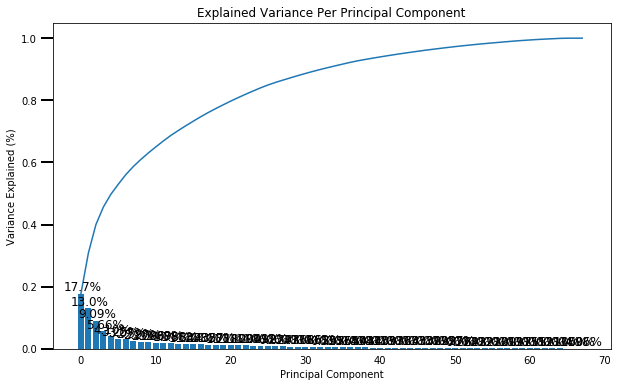

In [58]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)


In [59]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(40)
X_pca = pca.fit_transform(df2_scaled)


In [60]:
X_pca.shape

(623209, 40)

### Discussion 2.2: Perform Dimensionality Reduction

How many principal components / transformed features are you retaining for the next step of the analysis?

I see in the plot, 40 principal components are enough to capture/hold 85% of our data, then I choose it in the re-apply PCA step.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [61]:
pca.components_[0].shape
df2_scaled.columns.shape

def method(pca, comp):
    map_dic ={}
    component = pca.components_[comp]
    i =0
    for feature in df2_scaled.columns:
        map_dic[component[i]] = feature
        i = i + 1
    
    # sort weitgh
    list_weight =[]
    for j in sorted(map_dic.keys()):
        list_weight.append(j)
        
    # print feature depend on weight sorted
    for weight in list_weight:
        print('Feature:',map_dic[weight],'\tWeight:',weight)


In [62]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
method(pca,0)


Feature: MOBI_REGIO 	Weight: -0.232286762088
Feature: PLZ8_ANTG1 	Weight: -0.217816802917
Feature: KBA05_ANTG1 	Weight: -0.216948432128
Feature: KBA05_GBZ 	Weight: -0.207559596998
Feature: FINANZ_MINIMALIST 	Weight: -0.205518090131
Feature: PLZ8_GBZ 	Weight: -0.165129840714
Feature: KONSUMNAEHE 	Weight: -0.158296137026
Feature: INNENSTADT 	Weight: -0.15645928271
Feature: LP_LEBENSPHASE_FEIN 	Weight: -0.14600915274
Feature: LP_LEBENSPHASE_GROB 	Weight: -0.130553564852
Feature: LIFE_STAGE 	Weight: -0.120738550225
Feature: BALLRAUM 	Weight: -0.118663592283
Feature: ALTERSKATEGORIE_GROB 	Weight: -0.113735886283
Feature: GEBAEUDETYP_RASTER 	Weight: -0.112502427583
Feature: MOVEMENT 	Weight: -0.110479794364
Feature: GREEN_AVANTGARDE 	Weight: -0.110479794364
Feature: FINANZ_VORSORGER 	Weight: -0.106998543774
Feature: ANZ_PERSONEN 	Weight: -0.0954281517462
Feature: SEMIO_LUST 	Weight: -0.0821274397989
Feature: KBA13_ANZAHL_PKW 	Weight: -0.0797967584249
Feature: SEMIO_ERL 	Weight: -0.0785216528

In [63]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
method(pca,1)


Feature: SEMIO_REL 	Weight: -0.265356342947
Feature: DECADE 	Weight: -0.251798693709
Feature: SEMIO_PFLICHT 	Weight: -0.241296220235
Feature: FINANZ_SPARER 	Weight: -0.23854414528
Feature: SEMIO_TRADV 	Weight: -0.232337711762
Feature: FINANZ_UNAUFFAELLIGER 	Weight: -0.226688306454
Feature: SEMIO_KULT 	Weight: -0.219626878137
Feature: FINANZ_ANLEGER 	Weight: -0.205940960452
Feature: SEMIO_FAM 	Weight: -0.180113595247
Feature: SEMIO_RAT 	Weight: -0.175836652544
Feature: ONLINE_AFFINITAET 	Weight: -0.158623193398
Feature: SEMIO_MAT 	Weight: -0.157051830465
Feature: SEMIO_SOZ 	Weight: -0.102346583887
Feature: PLZ8_ANTG1 	Weight: -0.0843910870174
Feature: MOBI_REGIO 	Weight: -0.0786241527497
Feature: KBA05_GBZ 	Weight: -0.0784028392557
Feature: KBA05_ANTG1 	Weight: -0.0711458084315
Feature: INNENSTADT 	Weight: -0.0696202180705
Feature: PLZ8_GBZ 	Weight: -0.0680219150698
Feature: ANZ_PERSONEN 	Weight: -0.0637615772212
Feature: SEMIO_VERT 	Weight: -0.0632234269994
Feature: KONSUMNAEHE 	Weight

In [64]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
method(pca,2)


Feature: ANREDE_KZ 	Weight: -0.367993673659
Feature: SEMIO_KAEM 	Weight: -0.338075020383
Feature: SEMIO_DOM 	Weight: -0.311915747912
Feature: SEMIO_KRIT 	Weight: -0.270772350764
Feature: SEMIO_RAT 	Weight: -0.217334622205
Feature: FINANZ_ANLEGER 	Weight: -0.187430931264
Feature: SEMIO_ERL 	Weight: -0.171526961436
Feature: DECADE 	Weight: -0.104954190577
Feature: FINANZ_SPARER 	Weight: -0.100548519646
Feature: FINANZ_UNAUFFAELLIGER 	Weight: -0.0897284340493
Feature: SEMIO_TRADV 	Weight: -0.0838190584542
Feature: SEMIO_PFLICHT 	Weight: -0.0753007261164
Feature: FINANZ_HAUSBAUER 	Weight: -0.0544014587745
Feature: ONLINE_AFFINITAET 	Weight: -0.0491339703698
Feature: INNENSTADT 	Weight: -0.0426649121743
Feature: PLZ8_ANTG1 	Weight: -0.0411283951109
Feature: KONSUMNAEHE 	Weight: -0.0363195185755
Feature: BALLRAUM 	Weight: -0.0356234244717
Feature: HH_EINKOMMEN_SCORE 	Weight: -0.0350380672055
Feature: PLZ8_GBZ 	Weight: -0.0339784972279
Feature: GEBAEUDETYP_RASTER 	Weight: -0.0292215584739
Fea

### Discussion 2.3: Interpret Principal Components

reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?

I see there are positive and negative weights, the positive meaning is more the principal component is in the direction of the corresponding feature, whereas the negative meaning is less the principal component is in the direction of the corresponding feature.


- for the first component: the smallest weight is in a feature called MOBI_REGIO , whereas the largest weight is in PLZ8_ANTG3.
- for the second component: the smallest weight is in a feature called SEMIO_REL , whereas the largest weight is in ALTERSKATEGORIE_GROB.
- for the third component: the smallest weight is in a feature called ANREDE_KZ , whereas the largest weight is in SEMIO_VERT.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [65]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans
def k_means(cluster):
    
    # run k-means clustering on the data and...
    
    kmeans = KMeans(n_clusters=cluster)
    model = kmeans.fit(X_pca)
    
    # compute the average within-cluster distances.
    score = np.abs(model.score(X_pca))
    
    return score
    

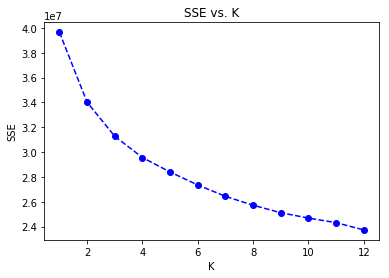

In [66]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

scores = []
centers = list(range(1,13))

for center in centers:
    scores.append(k_means(center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [79]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.


kmeans = KMeans(n_clusters=12)

model = kmeans.fit(X_pca)

pred = model.predict(X_pca)


### Discussion 3.1: Apply Clustering to General Population

Into how many clusters have you decided to segment the population?

I try cluster form 1 to 12, then I see the best one is 12 cluster how to have the distance between points is smallest than another cluster.
Maybe if I increase it to 13 and over, will be a small change between the distance of the cluster, which means there is no big change so we reach the elbow area. But actually, I didn't try from 13 and above because this takes a long time without an end run. So I kept it from 1 to 12.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [68]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep=';')


In [69]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Apply preprocessing
customer_after_clean = clean_data(customers)
print('Check ro nulls:',customer_after_clean.isnull().sum().sum())


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-p

Check ro nulls: 0


In [87]:
# Apply feature scaling to the general population demographics data.

customer_scaled = scaler.transform(customer_after_clean)
customer_scaled = pd.DataFrame(customer_scaled, columns = customer_after_clean.columns)
print(customer_scaled.shape)


(115643, 68)


In [88]:
# apply PCA
X_pca2 = pca.transform(customer_scaled)

In [89]:
# clustering
pred2 = model.predict(X_pca2)

In [90]:
X_pca2.shape

(115643, 40)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

Text(0.5,1,'Distribution of customer')

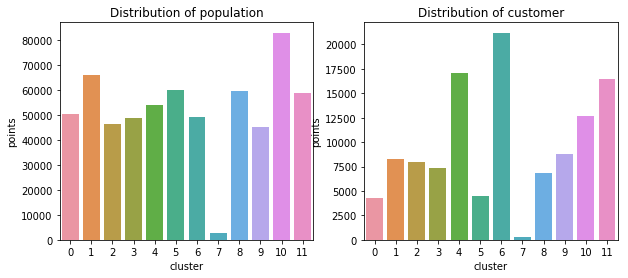

In [91]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

counts_population = pd.Series(pred).value_counts()
counts_customer = pd.Series(pred2).value_counts()
    
df_population = pd.DataFrame({'cluster':list(counts_population.index),'points':list(counts_population.values) })
df_customer = pd.DataFrame({'cluster':list(counts_customer.index),'points':list(counts_customer.values) })



fig2, axs2 = plt.subplots(1,2, figsize=(10, 4))
sns.barplot(x="cluster", y="points",ax=axs2[0], data=df_population)
axs2[0].set_title('Distribution of population')


sns.barplot(x="cluster", y="points",ax=axs2[1], data=df_customer)
axs2[1].set_title('Distribution of customer')

In [97]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

cluster_overrepresented = 6
customer_back = scaler.inverse_transform(pca.inverse_transform(X_pca2))
customer_back = pd.DataFrame(customer_back, columns = customer_after_clean.columns)
customer_back['label'] = pred2
display(customer_back[customer_back['label']==6].head(20))


'''
The cluster 6 is overrepresents in customer dataset compared to the general population. 
the kind of people here with the this attributes:
- Movement= most of them (mean) have value 2 which is avantgarde
- ALTERSKATEGORIE_GROB =most of them(mean) have value 3.64
- FINANZ_SPARER =most of them(mean) have 1.06
- FINANZ_MINIMALIST = most of them(mean) have 5.06
'''

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,MOVEMENT,DECADE,WEALTH,LIFE_STAGE,label
0,4.105938,0.863671,4.985114,1.185149,5.023080,1.265001,1.547162,2.154616,1.009092,1.041623,...,4.735311,5.056815,1.233189,2.434054,0.678473,2.009092,2.303308,0.937456,3.007212,6
5,3.955831,0.806091,5.076269,1.054831,4.966266,0.992202,1.790658,2.115636,1.014523,0.959346,...,2.924411,3.222962,2.621001,4.157399,3.302376,2.014523,2.335912,0.921999,5.009814,6
7,3.405028,0.944274,5.017463,1.054125,4.660002,0.764877,2.190811,2.293163,1.036773,0.877231,...,2.868754,3.708814,1.533914,3.275522,1.517699,2.036773,2.748149,0.962296,4.026265,6
10,3.216854,1.062282,5.119252,1.034953,4.904122,0.884129,1.356456,2.138998,1.018583,0.880547,...,5.437382,5.496433,2.413204,5.746828,1.489737,2.018583,2.568809,0.697020,4.942221,6
11,3.533961,0.886174,4.984915,1.090104,4.769559,0.808747,2.139250,1.952894,1.015004,1.072289,...,2.983763,3.979997,2.870574,4.942564,2.971773,2.015004,2.827388,0.928822,4.999639,6
28,3.770104,0.992870,5.179882,1.343991,4.580884,1.208049,2.235636,1.159178,1.011526,1.071559,...,3.169281,3.069999,2.484820,5.752177,2.342493,2.011526,2.667648,1.295383,4.231407,6
36,3.429826,1.004495,5.321932,0.984339,4.900976,0.969500,1.466997,2.263416,0.944252,1.949494,...,3.737554,3.814266,2.393935,5.355293,1.538275,1.944252,2.212357,2.728055,4.141346,6
39,2.944571,1.046332,4.960541,1.416740,5.072363,2.285901,0.838860,1.789097,0.981987,3.218375,...,4.216214,4.680500,3.373854,5.056678,3.710647,1.981987,3.207205,1.368451,2.031956,6
40,3.089062,1.220213,4.679043,1.269630,4.444696,0.531705,2.525939,1.840940,1.033237,1.088746,...,3.211298,3.835965,3.475404,7.474196,4.503965,2.033237,3.514325,0.521635,4.872776,6
50,4.159321,0.813378,5.131721,1.154699,4.955556,1.096041,1.187914,1.637037,1.053473,1.076962,...,2.997791,2.990081,1.856411,5.670114,1.210586,2.053473,2.287039,2.510455,3.935217,6


'\nThe cluster 6 is overrepresents in customer dataset compared to the general population. \nthe kind of people here with the this attributes:\n- Movement= most of them have 2 (avantgarde)\n- GREEN_AVANTGARDE= most of them have 2\n- ALTERSKATEGORIE_GROB =most of them have 4\n- ANREDE_KZ & FINANZ_SPARER =most of them have 1\n- FINANZ_MINIMALIST & FINANZ_VORSORGER = most of them have 5\n'

In [98]:
display(customer_back[customer_back['label']==6].describe())

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,MOVEMENT,DECADE,WEALTH,LIFE_STAGE,label
count,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,...,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.0
mean,3.649271,0.987952,5.062001,1.062972,4.895568,0.973083,1.660584,2.124361,1.004711,1.627225,...,3.738813,3.951623,2.890103,5.550066,3.006593,2.004711,2.447649,1.671197,3.975578,6.0
std,0.379591,0.124814,0.245534,0.235539,0.347941,0.320097,0.515810,0.569089,0.033290,0.787203,...,0.896443,0.738993,0.863966,1.334015,1.334948,0.033290,0.472169,0.948681,0.961280,0.0
min,2.337237,0.608683,3.576513,0.497748,2.394750,-0.032532,0.254570,0.067834,0.000014,0.673700,...,0.981817,0.935233,0.873440,1.182421,-0.803035,1.000014,1.280715,0.215910,0.736394,6.0
25%,3.307922,0.896682,4.952575,0.924227,4.778156,0.770620,1.264442,1.917917,0.988085,0.984825,...,3.022869,3.356149,2.263467,4.692482,2.004371,1.988085,2.144105,0.972555,3.851883,6.0
50%,3.704673,0.981977,5.097803,1.022452,4.958126,0.949775,1.608873,2.090027,1.006319,1.119965,...,3.722836,3.884875,2.877166,5.562366,2.992267,2.006319,2.365950,1.323556,4.029646,6.0
75%,3.941515,1.077443,5.216563,1.133895,5.115935,1.135379,1.945802,2.283383,1.023260,2.023375,...,4.370000,4.571247,3.570482,6.462849,4.162607,2.023260,2.630680,2.089757,4.909327,6.0
max,4.674273,1.388055,5.834873,2.814120,5.729081,3.287019,4.528030,5.527775,1.122682,3.278826,...,6.271344,6.025038,5.657436,8.963445,5.980467,2.122682,5.508097,5.331389,5.326510,6.0


In [99]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
customer_underrepresented = 0

display(customer_back[customer_back['label']==0].head(20))


'''
The cluster 0 is underrepresented in customer dataset compared to the general population. 
the kind of people here with the this attributes:

- Movement= most of them (mean) have value 1 which is mainstream.
- ALTERSKATEGORIE_GROB =most of them(mean) have value 2.77
- FINANZ_SPARER =most of them(mean) have 2.55
- FINANZ_MINIMALIST = most of them(mean) have 3.33
'''

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,MOVEMENT,DECADE,WEALTH,LIFE_STAGE,label
13,2.052372,1.098638,2.269881,3.519212,2.659801,2.970792,3.667999,2.789566,-0.025056,1.035683,...,3.071291,1.057569,3.268357,8.554638,4.595311,0.974944,6.015521,4.078820,1.029603,0
21,3.223202,1.006157,4.865797,1.867815,3.594065,1.183724,2.562396,0.560081,1.006588,1.033217,...,3.772257,3.229615,3.201197,6.512585,3.869668,2.006588,4.056678,3.798858,3.927770,0
56,2.216398,1.001150,3.417912,2.366982,3.687930,1.714468,2.454989,2.354294,0.959991,2.165605,...,3.147382,3.208032,3.764238,7.533569,4.287764,1.959991,4.387970,4.299741,4.959325,0
86,1.733838,0.955628,1.821587,3.954144,1.576313,4.025989,3.172696,3.964686,-0.004050,2.861815,...,4.611708,2.166258,4.427319,9.071449,2.583078,0.995950,6.846650,3.959654,1.050354,0
149,2.261893,0.843838,3.416181,2.278507,3.203586,2.400241,1.277573,3.282130,-0.017637,2.998069,...,3.049955,0.966279,3.344377,6.648962,1.785971,0.982363,4.356485,5.182572,4.024479,0
193,2.912018,1.032123,3.109847,1.924962,4.809425,2.247222,1.068303,3.882474,0.038828,2.848141,...,4.634574,3.944756,3.670114,6.182807,4.182224,1.038828,3.268291,4.653727,3.981171,0
238,4.003570,1.073925,3.819198,2.108620,3.685346,1.688151,2.835957,2.287404,0.976313,1.948600,...,5.108880,4.312325,3.400295,6.200269,4.397510,1.976313,3.724879,4.132230,0.984159,0
250,1.828350,0.897720,3.950519,2.082956,2.806354,1.472974,2.844554,2.883827,0.018205,1.022557,...,3.789244,3.232925,4.628609,8.141852,2.519996,1.018205,4.353849,4.114993,5.152199,0
252,1.680395,1.007531,1.908223,3.985352,1.987696,3.733127,5.015605,3.132878,1.009501,1.978506,...,3.313503,2.145125,3.290755,5.102349,4.934604,2.009501,6.575693,4.702011,3.877653,0
255,2.996559,1.035161,3.145974,2.207306,3.548882,1.660040,3.132041,3.276618,0.948128,3.111350,...,3.170782,3.018394,3.388467,5.722059,3.675575,1.948128,3.988137,3.648421,5.152289,0


'\nThe cluster 10 is underrepresented in customer dataset compared to the general population. \nthe kind of people here with the this attributes:\n- Movement= most of them have 1 (mainstream)\n- GREEN_AVANTGARDE= most of them have 0\n- FINANZ_UNAUFFAELLIGER & FINANZ_ANLEGER = most of them have 1\n- ALTERSKATEGORIE_GROB =most of them have 4\n- ANREDE_KZ & FINANZ_SPARER =most of them 1 but there are diversified values\n- FINANZ_MINIMALIST =most of them have 3\n- FINANZ_VORSORGER =most of them have 5\n'

In [100]:
display(customer_back[customer_back['label']==0].describe())

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,MOVEMENT,DECADE,WEALTH,LIFE_STAGE,label
count,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,...,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.0
mean,2.778005,0.996141,3.335243,2.554092,3.401111,2.301180,2.737379,2.640258,0.389519,2.479925,...,3.792856,2.856708,3.485144,6.971426,3.715262,1.389519,4.641934,3.821408,2.516313,0.0
std,0.614378,0.101314,0.896800,0.827200,0.941957,1.038568,1.181237,1.201097,0.484159,0.768111,...,0.783991,0.893418,0.735406,1.427253,1.067406,0.484159,1.222588,1.125424,1.543426,0.0
min,1.280430,0.645388,0.378157,0.824846,0.834077,0.133908,0.121835,-0.250105,-0.104036,0.771394,...,1.168612,0.281842,1.011759,1.749733,-0.354791,0.895964,1.671559,0.479381,0.659343,0.0
25%,2.235017,0.923438,2.921715,2.022091,2.728420,1.463113,1.895366,1.957166,-0.007653,1.961701,...,3.180722,2.232752,3.092338,6.078485,2.846258,0.992347,4.020607,3.181994,1.012123,0.0
50%,2.999709,0.998980,3.387559,2.406902,3.622785,2.191851,2.618473,2.519913,0.021912,2.914690,...,3.815778,2.897030,3.508001,7.148782,3.776843,1.021912,4.456786,4.030885,2.173812,0.0
75%,3.188137,1.068655,3.897550,3.050297,3.938823,2.999076,3.404306,3.298598,0.973624,3.050696,...,4.392173,3.364998,3.997020,8.093219,4.595113,1.973624,5.449808,4.731968,3.979534,0.0
max,4.412630,1.378739,5.335513,4.690339,5.595196,5.746233,5.854562,6.010018,1.089791,3.287170,...,6.089700,5.538059,5.555783,10.047322,5.967638,2.089791,7.924051,5.860505,5.319590,0.0


### Discussion 3.3: Compare Customer Data to Demographics Data

Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?

Cluster 11:Segment of people for customer dataset are more relatively popular with the mail-order company(overrepresented) than for population dataset they relatively unpopular with the company(underrepresented).


The kinds of people(overrepresented) in cluster 6:
The cluster 6 is overrepresents in customer dataset compared to the general population. 
the kind of people here with the this attributes:
- Movement= most of them (mean) have value 2 which is avantgarde
- ALTERSKATEGORIE_GROB =most of them(mean) have value 3.64
- FINANZ_SPARER =most of them(mean) have 1.06
- FINANZ_MINIMALIST = most of them(mean) have 5.06

----

The kinds of people(underrepresented) in cluster 0: 
The cluster 0 is underrepresented in customer dataset compared to the general population. 
the kind of people here with the this attributes:

- Movement= most of them (mean) have value 1 which is mainstream.
- ALTERSKATEGORIE_GROB =most of them(mean) have value 2.77
- FINANZ_SPARER =most of them(mean) have 2.55
- FINANZ_MINIMALIST = most of them(mean) have 3.33

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.